<a href="https://colab.research.google.com/github/Rickmwasofficial/Flower-Species-Prediction/blob/main/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flower Recognition Using Convulutional Neural Networks

I am going to use the Flowers Dataset from [DPhi Data Sprint #25: Flower Recognition.](https://dphi.tech/practice/challenge/61)

**Description**

The dataset contains raw jpeg images of five types of flowers namely - *`daisy`*, *`dandelion`*, *`rose`*, *`sunflower`* and *`tulip`* which contain the images of the respective flowers


In [38]:
# Get the data
import zipfile

# Unzip downloaded files
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Copy of flowers.zip")
zip_ref.extractall()
zip_ref.close()

In [39]:
# Inspecting the data
!ls flowers

sample_submission.csv  test  Testing_set_flower.csv  train


In [40]:
!ls flowers/train/

daisy  dandelion  rose	sunflower  tulip


In [41]:
!ls flowers/train/daisy

10140303196_b88d3d6cec.jpg    2573240560_ff7ffdd449.jpg    5087720485_c0914fb623.jpg
10172379554_b296050f82_n.jpg  2578695910_5ab8ee17c1_n.jpg  5109508979_68e3530791_m.jpg
10172567486_2748826a8b.jpg    2579018590_74359dcf1a_m.jpg  5110105726_53eb7a93be_m.jpg
10172636503_21bededa75_n.jpg  2581171297_b0a249b92b_n.jpg  5110107234_12ddc0206b_m.jpg
10391248763_1d16681106_n.jpg  2590291468_2635d3e4e0_n.jpg  5110109540_beed4ed162_m.jpg
10437754174_22ec990b77_m.jpg  2599662355_7782218c83.jpg    5110110938_9da91455c4_m.jpg
10437770546_8bb6f7bdd3_m.jpg  2607132536_d95198e619_n.jpg  5133243796_44de429de5_m.jpg
10437929963_bc13eebe0c.jpg    2611119198_9d46b94392.jpg    5135131051_102d4878ca_n.jpg
10466290366_cc72e33532.jpg    2612704455_efce1c2144_m.jpg  5434742166_35773eba57_m.jpg
10466558316_a7198b87e2.jpg    2617111535_54c2ac8462.jpg    5434901893_4550be3f84_m.jpg
10555749515_13a12a026e.jpg    2619413565_61a6cd3ac9_m.jpg  5434913005_409c1e8b56_n.jpg
10555815624_dc211569b0.jpg    2621723097_736f

Checking the number of images in the directories

In [118]:
# Number of images in the train directory
import os

for dirpath, dirnames, filenames in os.walk("flowers"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 2 files in flowers
There are 5 directories and 0 files in flowers/train
There are 0 directories and 495 files in flowers/train/sunflower
There are 0 directories and 495 files in flowers/train/rose
There are 0 directories and 495 files in flowers/train/dandelion
There are 0 directories and 495 files in flowers/train/tulip
There are 0 directories and 495 files in flowers/train/daisy
There are 0 directories and 924 files in flowers/test


In [43]:
# Delete excess files to make our training data be balanced
import random
def delete_excess_files(directory, target):
  """
  This function deletes excess number of files randomly
  """
  files = os.listdir(directory)
  excess = len(files) - target

  if excess > 0:
    for _ in range(excess):
      files = os.listdir(directory)
      file_to_delete = random.choice(files)
      os.remove(os.path.join(directory, file_to_delete))

In [44]:
for dirpath, dirnames, filenames in os.walk('flowers/train/'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
  if dirpath != 'flowers/train/':
    delete_excess_files(dirpath, 495)
    print(f"Deleted for {dirpath}")

There are 5 directories and 0 files in flowers/train/
There are 0 directories and 495 files in flowers/train/sunflower
Deleted for flowers/train/sunflower
There are 0 directories and 497 files in flowers/train/rose
Deleted for flowers/train/rose
There are 0 directories and 646 files in flowers/train/dandelion
Deleted for flowers/train/dandelion
There are 0 directories and 607 files in flowers/train/tulip
Deleted for flowers/train/tulip
There are 0 directories and 501 files in flowers/train/daisy
Deleted for flowers/train/daisy


In [136]:
for dirpath, dirnames, filenames in os.walk("flowers"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 3 directories and 2 files in flowers
There are 5 directories and 0 files in flowers/validation
There are 0 directories and 99 files in flowers/validation/sunflower
There are 0 directories and 99 files in flowers/validation/rose
There are 0 directories and 99 files in flowers/validation/dandelion
There are 0 directories and 99 files in flowers/validation/tulip
There are 0 directories and 99 files in flowers/validation/daisy
There are 5 directories and 0 files in flowers/train
There are 0 directories and 396 files in flowers/train/sunflower
There are 0 directories and 396 files in flowers/train/rose
There are 0 directories and 396 files in flowers/train/dandelion
There are 0 directories and 396 files in flowers/train/tulip
There are 0 directories and 396 files in flowers/train/daisy
There are 0 directories and 924 files in flowers/test


#### Now all files are 495 so our model will not be biased

In [47]:
# Now I will get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path('flowers/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype='<U9')

In [98]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Now let us randomly visualize the images
def view_random_image(target_dir, target_class):
  """
  This function takes the target directory and class to randomly visualize the images of that class in the given directory
  """
  img_dir = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(img_dir), 1)

  img = mpimg.imread(img_dir+ "/" + random_image[0])
  plt.imshow(img)
  plt.xlabel(target_class)
  plt.xticks([])
  plt.yticks([])
  return img




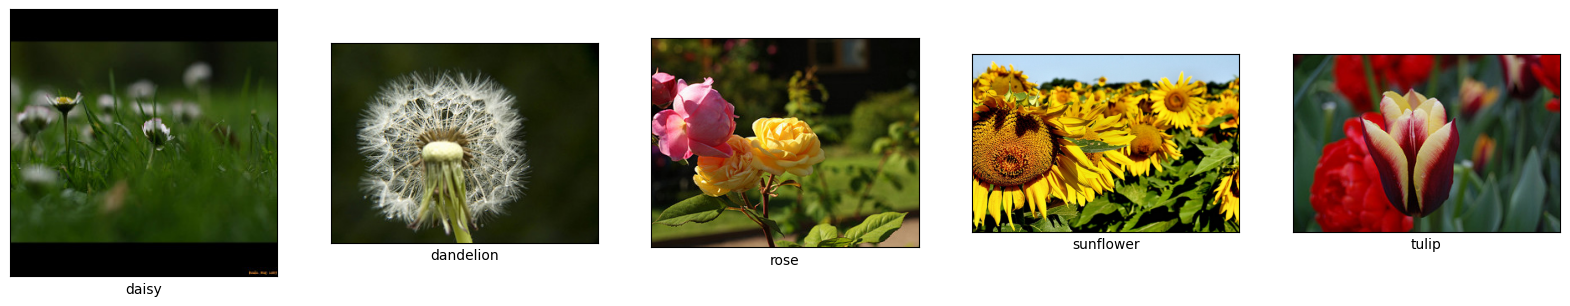

In [110]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 5, 1)
rand_1 = view_random_image(str(data_dir), class_names[0])
plt.subplot(1, 5, 2)
rand_2 = view_random_image(str(data_dir), class_names[1])
plt.subplot(1, 5, 3)
rand_3 = view_random_image(str(data_dir), class_names[2])
plt.subplot(1, 5, 4)
rand_4 = view_random_image(str(data_dir), class_names[3])
plt.subplot(1, 5, 5)
rand_5 = view_random_image(str(data_dir), class_names[4])


In [111]:
import tensorflow as tf
tf.constant(rand_1)

<tf.Tensor: shape=(240, 240, 3), dtype=uint8, numpy=
array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [73, 38,  6],
        [99, 72, 45],
        [70, 48, 25]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [31, 21, 11],
        [38, 30, 19],
        [12,  3,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3,  3,  3],
        [ 0,  0,  4],
        [ 0,  0,  5]]], dtype=uint8)>

In [112]:
tf.constant(rand_1 / 255.0) # Normalization

<tf.Tensor: shape=(240, 240, 3), dtype=float64, numpy=
array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.  

### Now let us load our data to be usewd to train the CNN

Since there is no labelled testind data, we will split the train and create a new validation folder

In [135]:
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_dir = 'flowers/train'
val_base_dir = 'flowers/validation'

# Create validation directories
if not os.path.exists(val_base_dir):
    os.makedirs(val_base_dir)
    for class_name in os.listdir(base_dir):
        os.makedirs(os.path.join(val_base_dir, class_name))

for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in val_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(val_base_dir, class_name, img))


In [183]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = 'flowers/train'
valid_dir = 'flowers/validation'

train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 8,
    shuffle = True
)

valid_data = train_datagen.flow_from_directory(
    directory = valid_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 8,
    shuffle = True
)


Found 1980 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [184]:
images, labels = next(train_data)
len(images), len(labels)

(8, 8)

In [185]:
len(train_data)

248

In [186]:
1980 / 32

61.875

In [187]:
images, labels = next(valid_data)
len(images), len(labels)

(8, 8)

In [188]:
images[:2], images[0].shape

(array([[[[0.74509805, 0.89019614, 0.96470594],
          [0.7490196 , 0.8745099 , 0.9568628 ],
          [0.7490196 , 0.8745099 , 0.9568628 ],
          ...,
          [0.00392157, 0.56078434, 0.80392164],
          [0.00784314, 0.5647059 , 0.8078432 ],
          [0.00784314, 0.54901963, 0.79215693]],
 
         [[0.7372549 , 0.882353  , 0.9568628 ],
          [0.74509805, 0.8705883 , 0.95294124],
          [0.74509805, 0.8705883 , 0.95294124],
          ...,
          [0.00392157, 0.56078434, 0.80392164],
          [0.00392157, 0.56078434, 0.80392164],
          [0.00392157, 0.5529412 , 0.79215693]],
 
         [[0.7372549 , 0.882353  , 0.9568628 ],
          [0.75294125, 0.87843144, 0.9607844 ],
          [0.75294125, 0.87843144, 0.9607844 ],
          ...,
          [0.00392157, 0.5647059 , 0.8000001 ],
          [0.00392157, 0.5647059 , 0.8000001 ],
          [0.        , 0.5568628 , 0.79215693]],
 
         ...,
 
         [[0.29803923, 0.3647059 , 0.16078432],
          [0.39215

In [189]:
labels

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Building the model

In [190]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Input
from tensorflow.keras.optimizers import Adam

In [193]:
# Lets create our base model
base_model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

base_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

base_hist = base_model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - accuracy: 0.1914 - loss: 1.6223 - val_accuracy: 0.1964 - val_loss: 1.5676
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.3087 - loss: 1.5430 - val_accuracy: 0.1786 - val_loss: 1.5591
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.3104 - loss: 1.4405 - val_accuracy: 0.6071 - val_loss: 1.2881
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.4879 - loss: 1.2278 - val_accuracy: 0.5536 - val_loss: 1.2385
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.4980 - loss: 1.3666 - val_accuracy: 0.4821 - val_loss: 1.1208


In [194]:
len(train_data)

248

<Axes: >

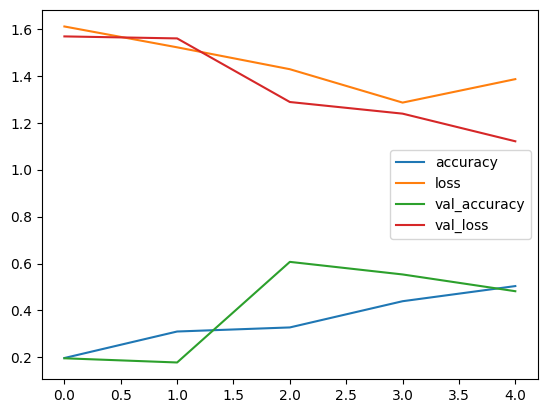

In [195]:
# Plot the loss curves
import pandas as pd
pd.DataFrame(base_hist.history).plot()

In [196]:
# Plot th eloss curves separately
def plot_loss_curves(history):
  """
  This function pltos loss curves separately
  """
  loss = history.history['loss']
  accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label='Validation_loss')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.ylabel('Loss')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label='Validation_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

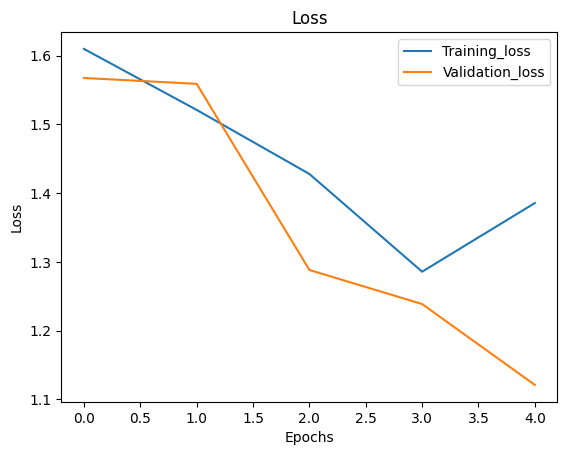

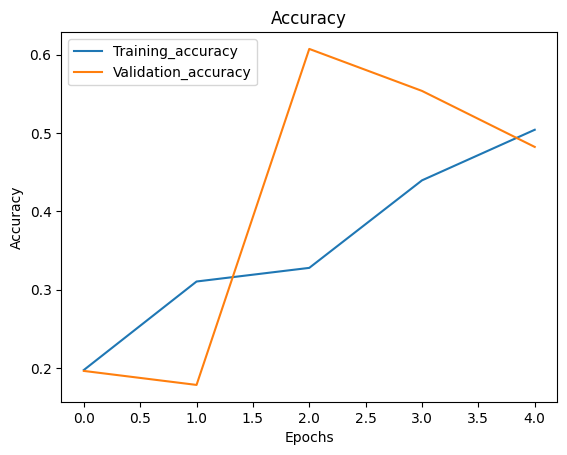

In [197]:
plot_loss_curves(base_hist)

Using a batch size of 8 means helps the model to learn better, now we are going to try and improve by beating the base model through overfitting. I am going to use a complex model

In [199]:
# Lets create a complex model
model_1 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

hist_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.2350 - loss: 1.6103 - val_accuracy: 0.1786 - val_loss: 1.5872
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.2520 - loss: 1.5529 - val_accuracy: 0.2321 - val_loss: 1.6542
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.2870 - loss: 1.5523 - val_accuracy: 0.3393 - val_loss: 1.5012
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.3910 - loss: 1.3877 - val_accuracy: 0.4464 - val_loss: 1.7848
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.3856 - loss: 1.4344 - val_accuracy: 0.4821 - val_loss: 1.3179


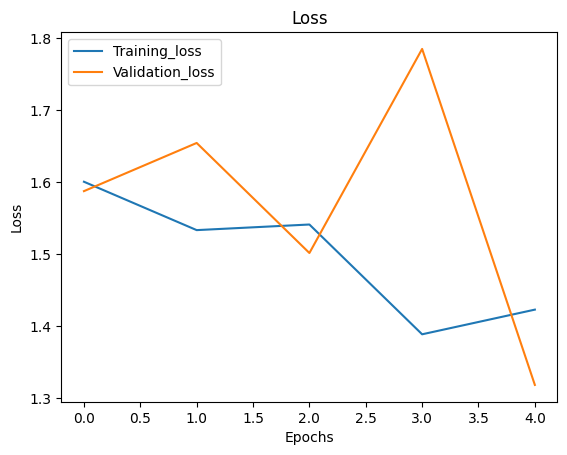

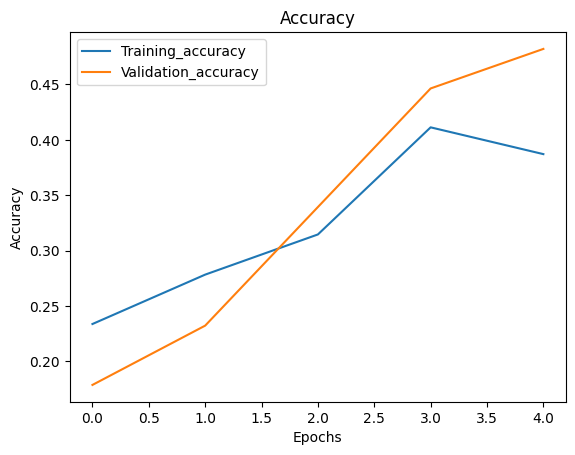

In [200]:
plot_loss_curves(hist_1)

### Finding the ideal learning rate
The fluctuating performance may suggest that the learning rate is not optimal.

In [215]:
# Lets create learning rate schedular
model_2 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.00021),
    metrics = ['accuracy']
)

# lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

hist_2 = model_2.fit(
    train_data,
    epochs = 8,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.2300 - loss: 1.6181 - val_accuracy: 0.1250 - val_loss: 1.6201
Epoch 2/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.2944 - loss: 1.6027 - val_accuracy: 0.2143 - val_loss: 1.6007
Epoch 3/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.2376 - loss: 1.6025 - val_accuracy: 0.2857 - val_loss: 1.5966
Epoch 4/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.2035 - loss: 1.6173 - val_accuracy: 0.2143 - val_loss: 1.6247
Epoch 5/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.1994 - loss: 1.5978 - val_accuracy: 0.3393 - val_loss: 1.6046
Epoch 6/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.2879 - loss: 1.5898 - val_accuracy: 0.3036 - val_loss: 1.5798
Epoch 7/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.2806 - loss: 1.5904 - val_accuracy: 0.2500 - val_loss: 1.6035
Epoch 8/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.2813 - loss: 1.5756 - val_accuracy: 0.2679 -

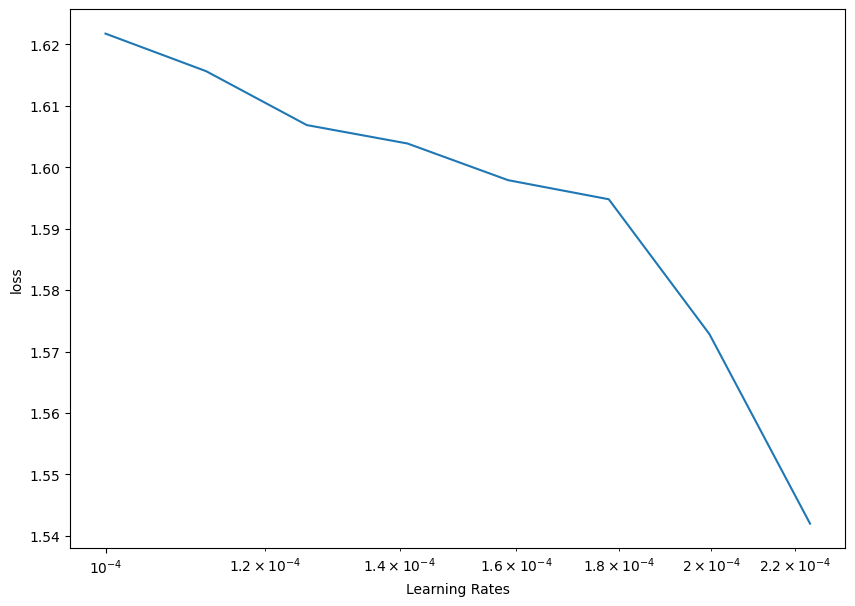

In [213]:
# plot the loss to the learning rate
lrs = 1e-4 * (10**(tf.range(8)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist_2.history['loss'])
plt.xlabel('Learning Rates')
plt.ylabel('loss')
plt.show()

In [214]:
2.1 * (10**-4)

0.00021

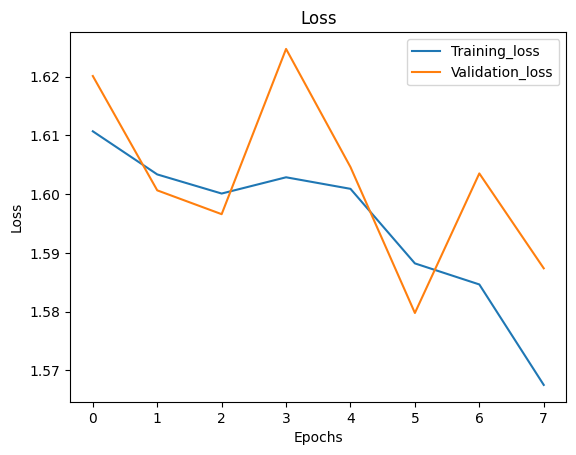

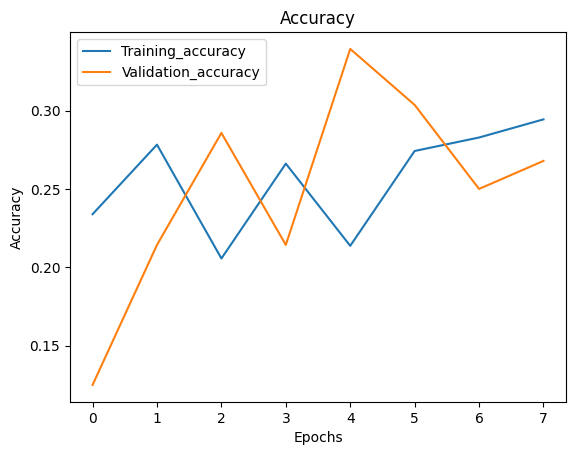

In [216]:
plot_loss_curves(hist_2)

In [283]:
# Try augmenting data to reduce overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much do you want to rotate an image
                                             shear_range=0.2, # How much do you want to shear an image
                                             zoom_range=0.2, # Zoom in randomly on an image
                                             height_shift_range=0.2, # Move in your image around on the y axis
                                             width_shift_range=0.2, # Move in your image around on the x axis
                                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = 'flowers/train'
valid_dir = 'flowers/validation'

train_data_aug = train_datagen_augmented.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 8,
    shuffle = True
)

valid_data = test_datagen.flow_from_directory(
    directory = valid_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 8,
    shuffle = True
)


Found 1980 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [284]:
# Lets fit the augmented data
model_3 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

# lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

hist_3 = model_3.fit(
    train_data_aug,
    epochs = 8,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/31 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.1226 - loss: 1.6146

KeyboardInterrupt: 

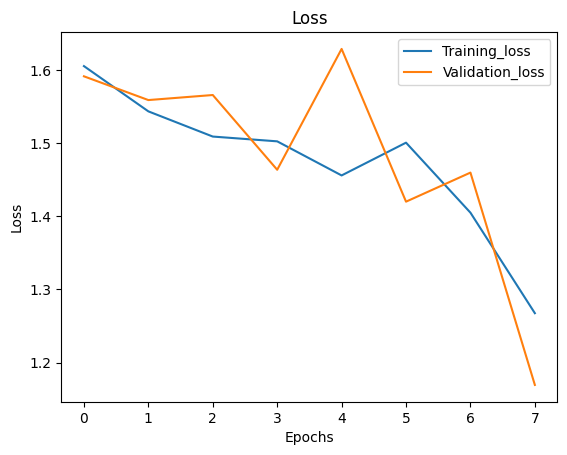

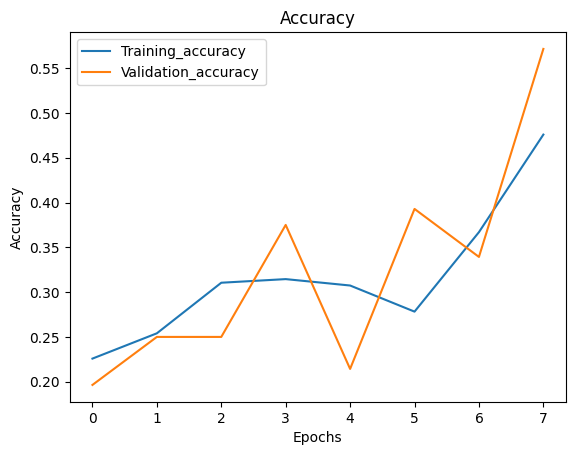

In [221]:
plot_loss_curves(hist_3)

In [242]:
# Lets find the ideal learning rate for the augmented data
model_4 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

hist_4 = model_4.fit(
    train_data_aug,
    epochs = 8,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8,
    callbacks = [lr_schedular]
)

Epoch 1/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 611ms/step - accuracy: 0.2042 - loss: 1.6363 - val_accuracy: 0.2679 - val_loss: 1.5594 - learning_rate: 1.0000e-04
Epoch 2/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 635ms/step - accuracy: 0.2621 - loss: 1.5861 - val_accuracy: 0.3929 - val_loss: 1.5029 - learning_rate: 1.1220e-04
Epoch 3/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 642ms/step - accuracy: 0.3436 - loss: 1.5043 - val_accuracy: 0.3750 - val_loss: 1.3868 - learning_rate: 1.2589e-04
Epoch 4/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 595ms/step - accuracy: 0.3232 - loss: 1.4671 - val_accuracy: 0.3393 - val_loss: 1.4200 - learning_rate: 1.4125e-04
Epoch 5/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 599ms/step - accuracy: 0.3806 - loss: 1.4553 - val_accuracy: 0.4286 - val_loss: 1.3886 - learning_rate: 1.5849e-04
Epoch 6/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 599ms/step - accuracy: 0.3674 - loss: 1.4467 - val_accuracy: 0.4643 - val_loss: 1.2630 - learning_rate: 1.7783e-04
Epoch 7/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 634ms/step - accuracy: 

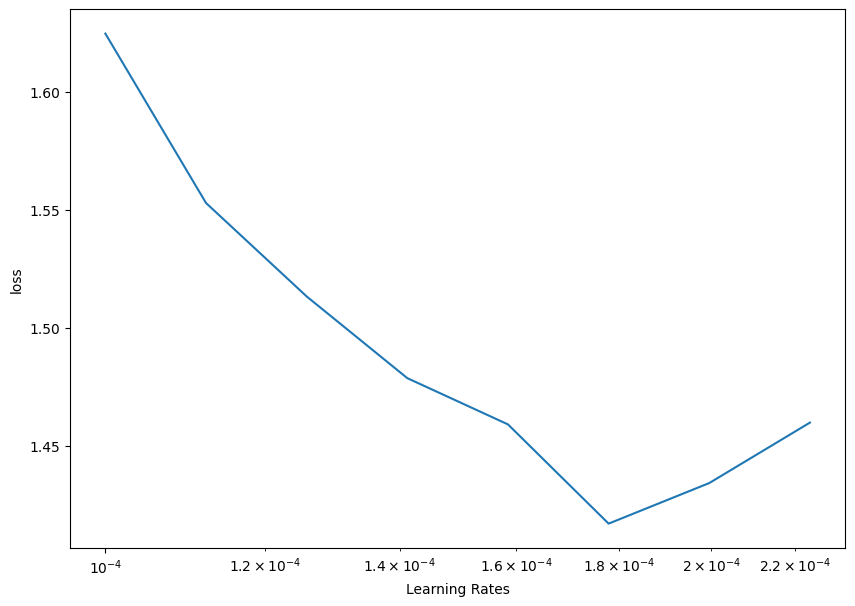

In [243]:
# plot the loss to the learning rate
lrs = 1e-4 * (10**(tf.range(8)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist_4.history['loss'])
plt.xlabel('Learning Rates')
plt.ylabel('loss')
plt.show()

In [244]:
1.7783e-04

0.00017783

In [245]:
# Lets fit with the new learning rate
model_5 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_5.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=1.7783e-04),
    metrics = ['accuracy']
)

hist_5 = model_5.fit(
    train_data_aug,
    epochs = 8,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 601ms/step - accuracy: 0.2480 - loss: 1.6415 - val_accuracy: 0.2321 - val_loss: 1.5656
Epoch 2/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 610ms/step - accuracy: 0.1859 - loss: 1.6223 - val_accuracy: 0.1429 - val_loss: 1.6014
Epoch 3/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 641ms/step - accuracy: 0.1379 - loss: 1.6217 - val_accuracy: 0.3750 - val_loss: 1.5157
Epoch 4/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 591ms/step - accuracy: 0.2750 - loss: 1.5867 - val_accuracy: 0.3571 - val_loss: 1.5099
Epoch 5/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 597ms/step - accuracy: 0.3912 - loss: 1.5193 - val_accuracy: 0.4286 - val_loss: 1.4791
Epoch 6/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 595ms/step - accuracy: 0.3867 - loss: 1.4706 - val_accuracy: 0.4821 - val_loss: 1.3737
Epoch 7/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 601ms/step - accuracy: 0.4547 - loss: 1.3346 - val_accuracy: 0.5000 - val_loss: 1.4196
Epoch 8/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.5192 - loss: 1.2790 - val_accuracy: 0.

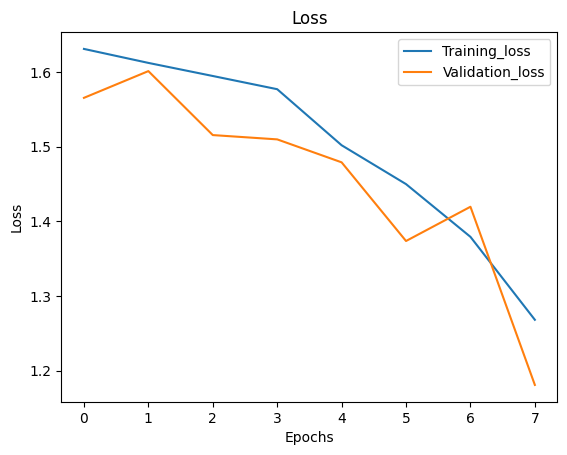

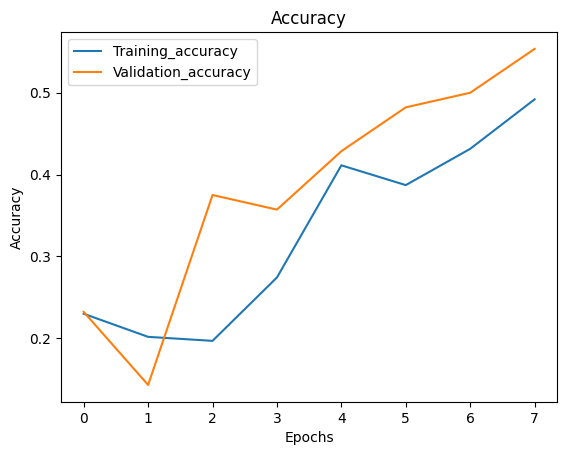

In [246]:
plot_loss_curves(hist_5)

### Lets try training the model for longer

In [285]:
# fit for longer
model_6 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_6.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=1.7783e-04),
    metrics = ['accuracy']
)

hist_6 = model_6.fit(
    train_data_aug,
    epochs = 16,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 611ms/step - accuracy: 0.2199 - loss: 1.6249 - val_accuracy: 0.2321 - val_loss: 1.5241
Epoch 2/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 626ms/step - accuracy: 0.2940 - loss: 1.5981 - val_accuracy: 0.3750 - val_loss: 1.5159
Epoch 3/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 640ms/step - accuracy: 0.3528 - loss: 1.5437 - val_accuracy: 0.3571 - val_loss: 1.4591
Epoch 4/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 615ms/step - accuracy: 0.3778 - loss: 1.4480 - val_accuracy: 0.4107 - val_loss: 1.3756
Epoch 5/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 601ms/step - accuracy: 0.3989 - loss: 1.4795 - val_accuracy: 0.3393 - val_loss: 1.5343
Epoch 6/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 613ms/step - accuracy: 0.3625 - loss: 1.4644 - val_accuracy: 0.3571 - val_loss: 1.4173
Epoch 7/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - accuracy: 0.3334 - loss: 1.4378 - val_accuracy: 0.3393 - val_loss: 1.6106
Epoch 8/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 573ms/step - accuracy: 0.3644 - loss: 1.3895 - val_accu

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4681 - val_loss: 1.2854
Epoch 10/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.3708 - loss: 1.3746 - val_accuracy: 0.4464 - val_loss: 1.2126
Epoch 11/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 605ms/step - accuracy: 0.4627 - loss: 1.3428 - val_accuracy: 0.4643 - val_loss: 1.3850
Epoch 12/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 655ms/step - accuracy: 0.4506 - loss: 1.3327 - val_accuracy: 0.4643 - val_loss: 1.2497
Epoch 13/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 597ms/step - accuracy: 0.3776 - loss: 1.4038 - val_accuracy: 0.4643 - val_loss: 1.2186
Epoch 14/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 596ms/step - accuracy: 0.3909 - loss: 1.4357 - val_accuracy: 0.5179 - val_loss: 1.2189
Epoch 15/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 597ms/step - accuracy: 0.4348 - loss: 1.3615 - val_accuracy: 0.6250 - val_loss: 0.9727
Epoch 16/16
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 609ms/step - accuracy: 0.4996 - loss: 1.2817 - val_ac

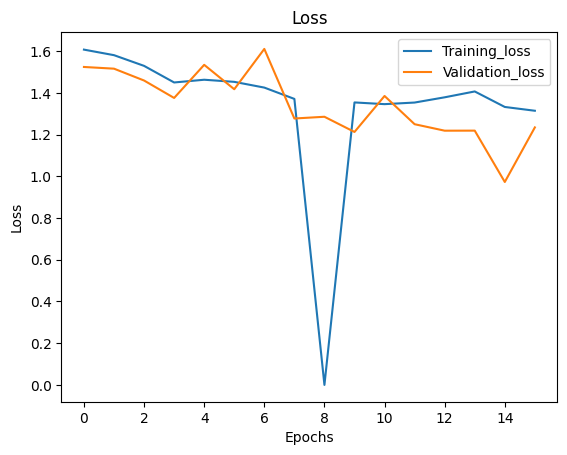

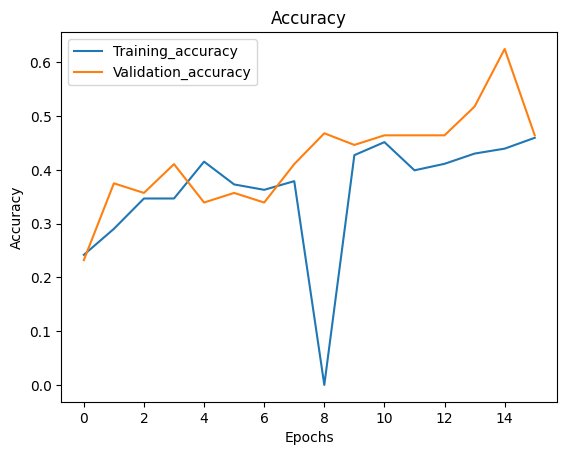

In [286]:
plot_loss_curves(hist_6)

In [287]:
# Train for even longer
model_7 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax')
])

model_7.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=1.7783e-04),
    metrics = ['accuracy']
)

hist_7 = model_7.fit(
    train_data_aug,
    epochs = 30,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = len(valid_data) // 8
)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 623ms/step - accuracy: 0.1521 - loss: 1.6263 - val_accuracy: 0.2321 - val_loss: 1.5773
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 659ms/step - accuracy: 0.1624 - loss: 1.5789 - val_accuracy: 0.2679 - val_loss: 1.5238
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 592ms/step - accuracy: 0.2500 - loss: 1.5045 - val_accuracy: 0.3214 - val_loss: 1.4688
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 601ms/step - accuracy: 0.3164 - loss: 1.4367 - val_accuracy: 0.3393 - val_loss: 1.4139
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 604ms/step - accuracy: 0.4105 - loss: 1.3810 - val_accuracy: 0.2857 - val_loss: 1.3867
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 623ms/step - accuracy: 0.3656 - loss: 1.4057 - val_accuracy: 0.4821 - val_loss: 1.1341
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 658ms/step - accuracy: 0.4545 - loss: 1.3794 - val_accuracy: 0.4821 - val_loss: 1.2240
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 572ms/step - accuracy: 0.5345 - loss: 1.2256 - val_accu

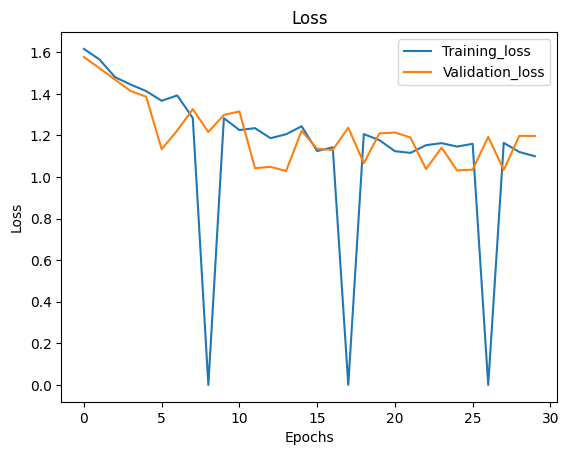

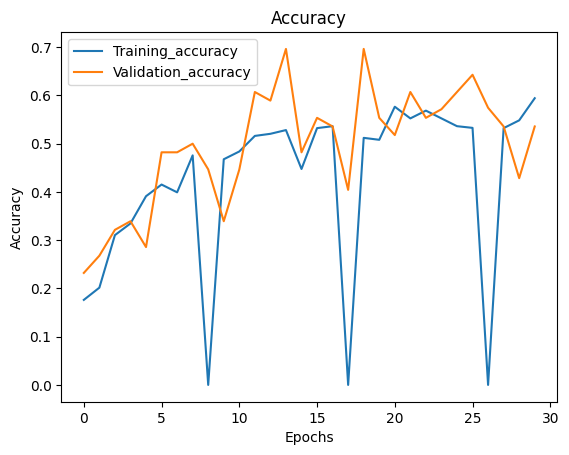

In [293]:
plot_loss_curves(hist_7)

In [304]:
model_6.save('/content/drive/MyDrive/Flower_CNN_TINY_VGG_V2.keras')

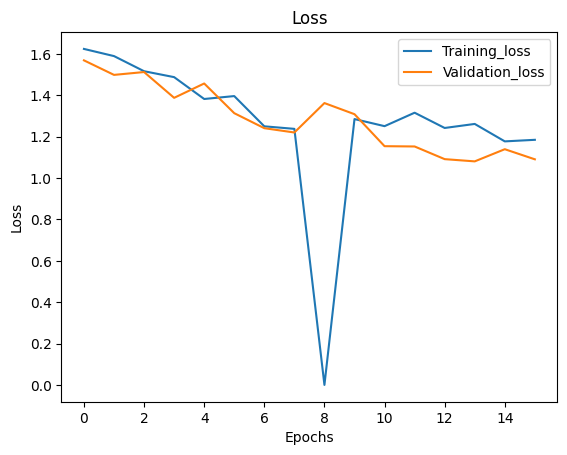

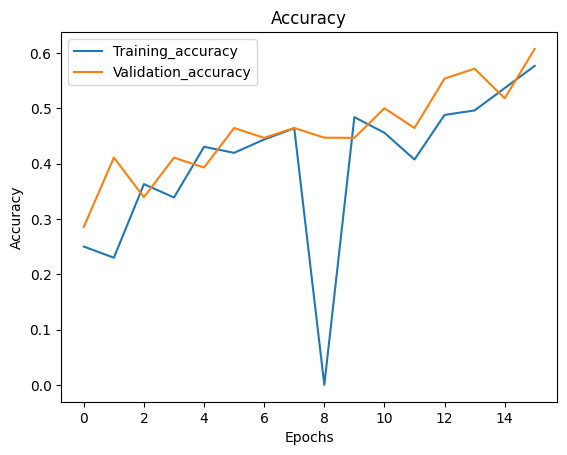

In [254]:
plot_loss_curves(hist_6)

# Making predictions

In [297]:
def make_prediction(filename, model=model_7, img_shape=224, class_names=class_names):
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img / 255.
  preds = model.predict(tf.expand_dims(img, axis=0))
  print(preds)
  value = class_names[tf.argmax(preds[0])]

  plt.figure()
  plt.imshow(img)
  plt.title(value)
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[1.1390247e-03 8.4818661e-05 9.9434644e-02 2.3863995e-02 8.7547749e-01]]


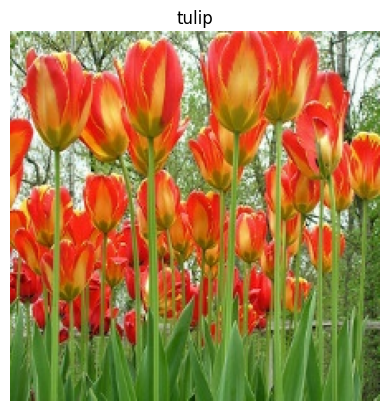

In [298]:
make_prediction("/content/flowers/test/Image_190.jpg")

In [264]:
class_names

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype='<U9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[2.3216297e-04 1.9391894e-06 2.0730394e-01 2.3048823e-03 7.9015708e-01]]


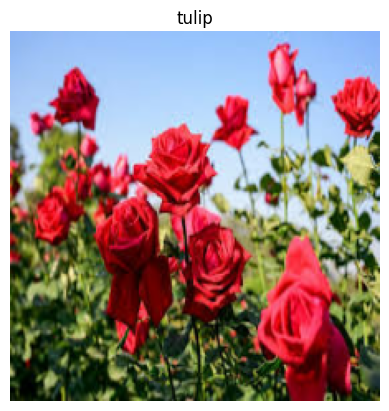

In [299]:
make_prediction("/content/rose.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.01820023 0.01102072 0.4290533  0.19444765 0.34727815]]


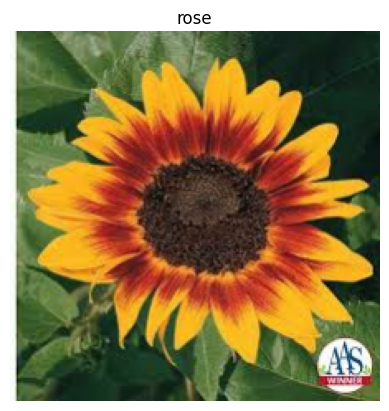

In [300]:
make_prediction("/content/sunflower.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.16220169 0.4822441  0.0736402  0.18368603 0.09822802]]


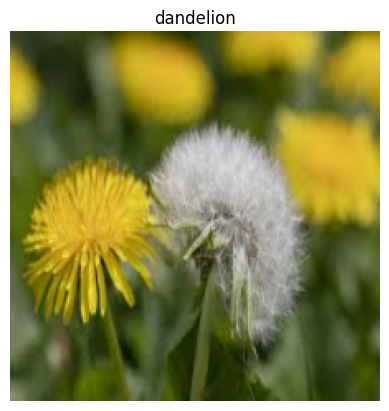

In [301]:
make_prediction("/content/damdelion.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.1254944  0.04585153 0.1418664  0.5761923  0.11059532]]


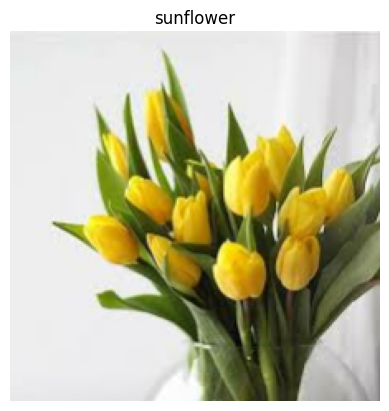

In [302]:
make_prediction("/content/tulip.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.69725955 0.15632541 0.08539577 0.01046355 0.05055573]]


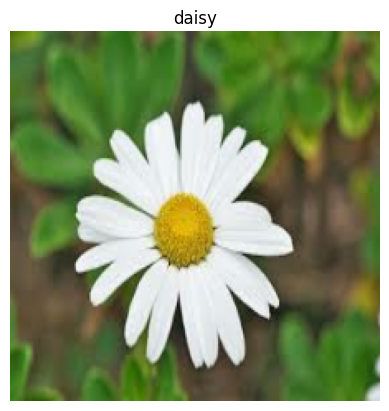

In [303]:
make_prediction("/content/daisy.jpeg")

In [305]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.4.1
